<a href="https://colab.research.google.com/github/github123-alt/Practiced/blob/main/Machine_Learning_Project_for_Accelerated_Komputing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***MACHINE LEARNING PROJECTS ***

# Prayash Phuyal
# Roll no: 078BME031
Pulchowk Campus, Institute of Engineering

# ***1. Covid 19 dataset***

In [ ]:
!pip install lightgbm
!pip install imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from geopy.distance import geodesic
import joblib


In [ ]:
!pip install imbalanced-learn

In [ ]:
covid = pd.read_csv('/covid19.csv')

In [ ]:
covid.head()

,Entity,Day,"Cumulative excess deaths per 100,000 people (central estimate)","Cumulative excess deaths per 100,000 people (95% CI, lower bound)","Cumulative excess deaths per 100,000 people (95% CI, upper bound)","Total confirmed deaths due to COVID-19 per 100,000 people"
0,Afghanistan,2020-01-01,-0.022148,-0.289158,0.420465,NaN
1,Afghanistan,2020-01-06,-0.044295,-0.570486,0.848026,0.0
2,Afghanistan,2020-01-13,-0.047579,-0.837293,1.281982,0.0
3,Afghanistan,2020-01-20,0.022123,-1.125014,1.698806,0.0
4,Afghanistan,2020-01-27,0.063374,-1.377656,2.177791,0.0


In [ ]:
covid.shape #Gives total number of records and columns

(517828, 6)

In [ ]:
covid["Entity"].value_counts()   #How many dates are recorded for each country

,count
Entity,
Afghanistan,2075
Albania,2075
American Samoa,2075
Algeria,2075
Andorra,2075
...,...
Cote d'Ivoire,234
Hong Kong,234
Macao,234


In [ ]:
covid.describe(include='O')  #description of all categorical columns

,Entity,Day
count,517828,517828
unique,254,2075
top,Afghanistan,2022-11-07
freq,2075,254


In [ ]:
covid.isna().any()  #Check if there are any null values

,0
Entity,False
Day,False
"Cumulative excess deaths per 100,000 people (central estimate)",True
"Cumulative excess deaths per 100,000 people (95% CI, lower bound)",True
"Cumulative excess deaths per 100,000 people (95% CI, upper bound)",True
"Total confirmed deaths due to COVID-19 per 100,000 people",True


In [ ]:
covid.isna().sum()    #sum of null values in each column

,0
Entity,0
Day,0
"Cumulative excess deaths per 100,000 people (central estimate)",462370
"Cumulative excess deaths per 100,000 people (95% CI, lower bound)",462370
"Cumulative excess deaths per 100,000 people (95% CI, upper bound)",462370
"Total confirmed deaths due to COVID-19 per 100,000 people",1402


In [ ]:
Nepal_case=covid[covid["Entity"]=="Nepal"]       #Getting the cases in Nepal

In [ ]:
Nepal_case.head()

,Entity,Day,"Cumulative excess deaths per 100,000 people (central estimate)","Cumulative excess deaths per 100,000 people (95% CI, lower bound)","Cumulative excess deaths per 100,000 people (95% CI, upper bound)","Total confirmed deaths due to COVID-19 per 100,000 people"
316094,Nepal,2020-01-01,0.117430,-0.206622,0.359181,NaN
316095,Nepal,2020-01-06,0.234653,-0.413637,0.719266,0.0
316096,Nepal,2020-01-13,0.375871,-0.652647,1.062463,0.0
316097,Nepal,2020-01-20,0.464430,-0.826195,1.582092,0.0
316098,Nepal,2020-01-27,0.571297,-1.046029,2.038382,0.0


In [ ]:
Nepal_case.tail()

,Entity,Day,"Cumulative excess deaths per 100,000 people (central estimate)","Cumulative excess deaths per 100,000 people (95% CI, lower bound)","Cumulative excess deaths per 100,000 people (95% CI, upper bound)","Total confirmed deaths due to COVID-19 per 100,000 people"
318164,Nepal,2025-09-03,NaN,NaN,NaN,40.49747
318165,Nepal,2025-09-04,NaN,NaN,NaN,40.49747
318166,Nepal,2025-09-05,NaN,NaN,NaN,40.49747
318167,Nepal,2025-09-06,NaN,NaN,NaN,40.49747
318168,Nepal,2025-09-07,NaN,NaN,NaN,40.49747


In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

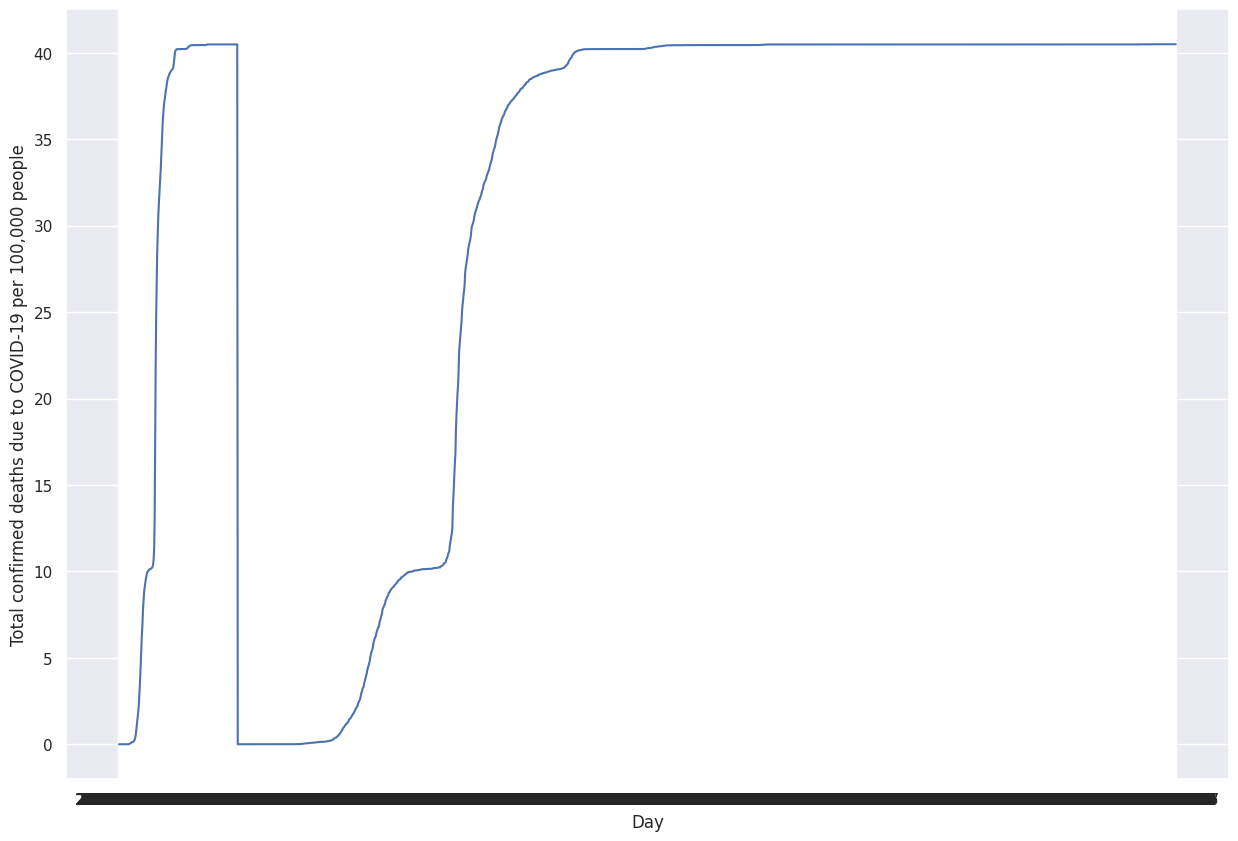

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Day", y="Total confirmed deaths due to COVID-19 per 100,000 people", data = Nepal_case)
plt.show()

In [ ]:
Nepal_last_5_days = Nepal_case.tail()

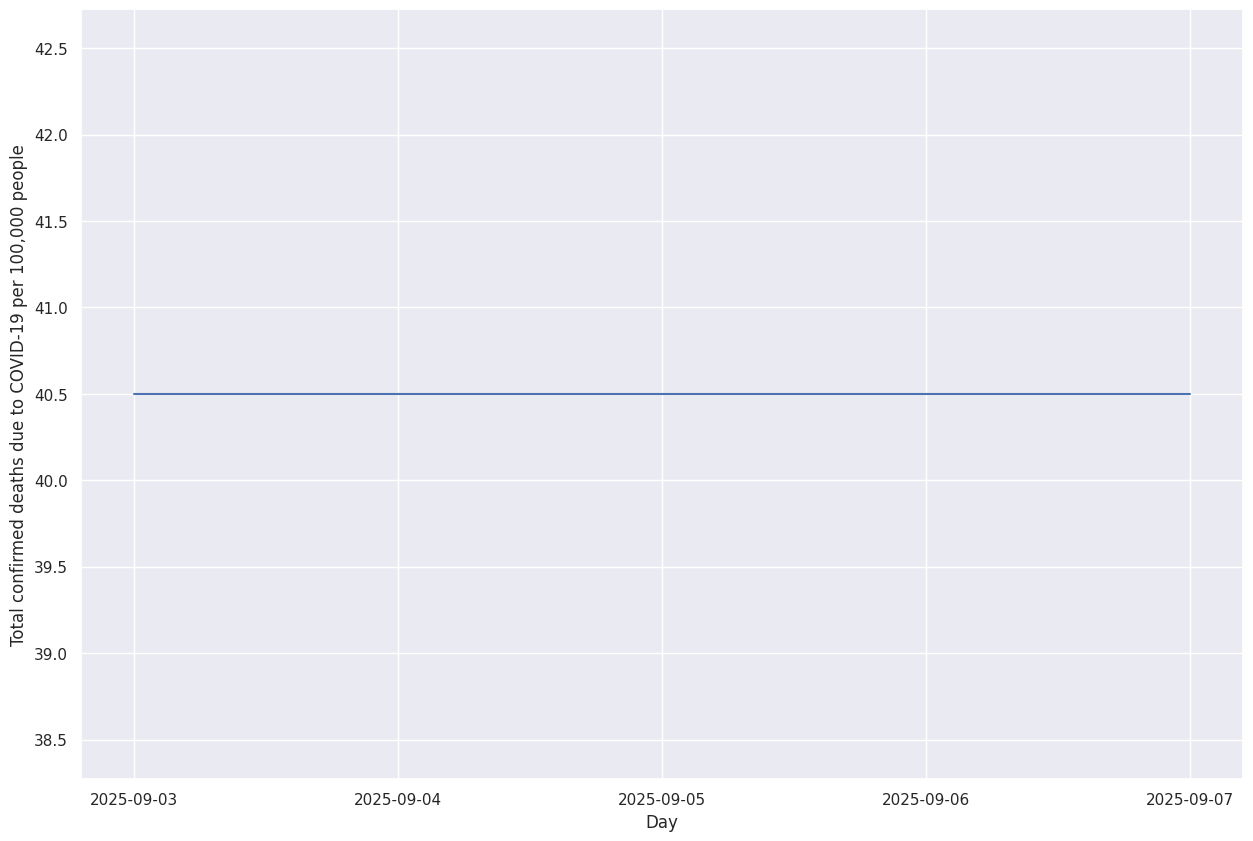

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Day", y="Total confirmed deaths due to COVID-19 per 100,000 people", data = Nepal_last_5_days)
plt.show()

# ***2. Pokemon Dataset***

In [ ]:
pokemon = pd.read_csv('/pokemon.csv')

In [ ]:
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
pokemon.shape

(800, 13)

In [ ]:
pokemon['Type 1'].value_counts()  #Give frequency of primary type present

,count
Type 1,
Water,112
Normal,98
Grass,70
Bug,69
Psychic,57
Fire,52
Rock,44
Electric,44
Ground,32


In [ ]:
pokemon['Generation'].value_counts()    #How many pokemons are from each generation

,count
Generation,
1,166
5,165
3,160
4,121
2,106
6,82


In [ ]:
pokemon['Legendary'].value_counts()   #How many pokemons are legendary

,count
Legendary,
False,735
True,65


In [ ]:
pokemon['Sp. Atk'].min()   #The minimum special attack
pokemon['Sp. Atk'].max()   #The maximum special attack
pokemon['Sp. Atk'].mean()  #The average special attack
pokemon['Sp. Atk'].median()#The median special attack

65.0

In [ ]:
pokemon.rename(columns={'Type 1': 'Primary'}, inplace=True)
pokemon.rename(columns={'Type 2': 'Secondary Type'}, inplace = True)

In [ ]:
pokemon    #view the renamed column

,#,Name,Primary,Secondary Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
grass_pokemons = pokemon[pokemon['Primary'] == 'Grass']
display(grass_pokemons)

,#,Name,Primary,Secondary Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
48,43,Oddish,Grass,Poison,320,45,50,55,75,65,30,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,650,Chespin,Grass,NaN,313,56,61,65,48,45,38,6,False
719,651,Quilladin,Grass,NaN,405,61,78,95,56,58,57,6,False
720,652,Chesnaught,Grass,Fighting,530,88,107,122,74,75,64,6,False
740,672,Skiddo,Grass,NaN,350,66,65,48,62,57,52,6,False


In [ ]:
grass_pokemons['Sp. Atk'].min()

24

In [ ]:
grass_pokemons['Sp. Atk'].max()

145

In [ ]:
grass_pokemons['Sp. Def'].max()

129

In [ ]:
grass_pokemons['Sp. Def'].mean()

np.float64(70.42857142857143)

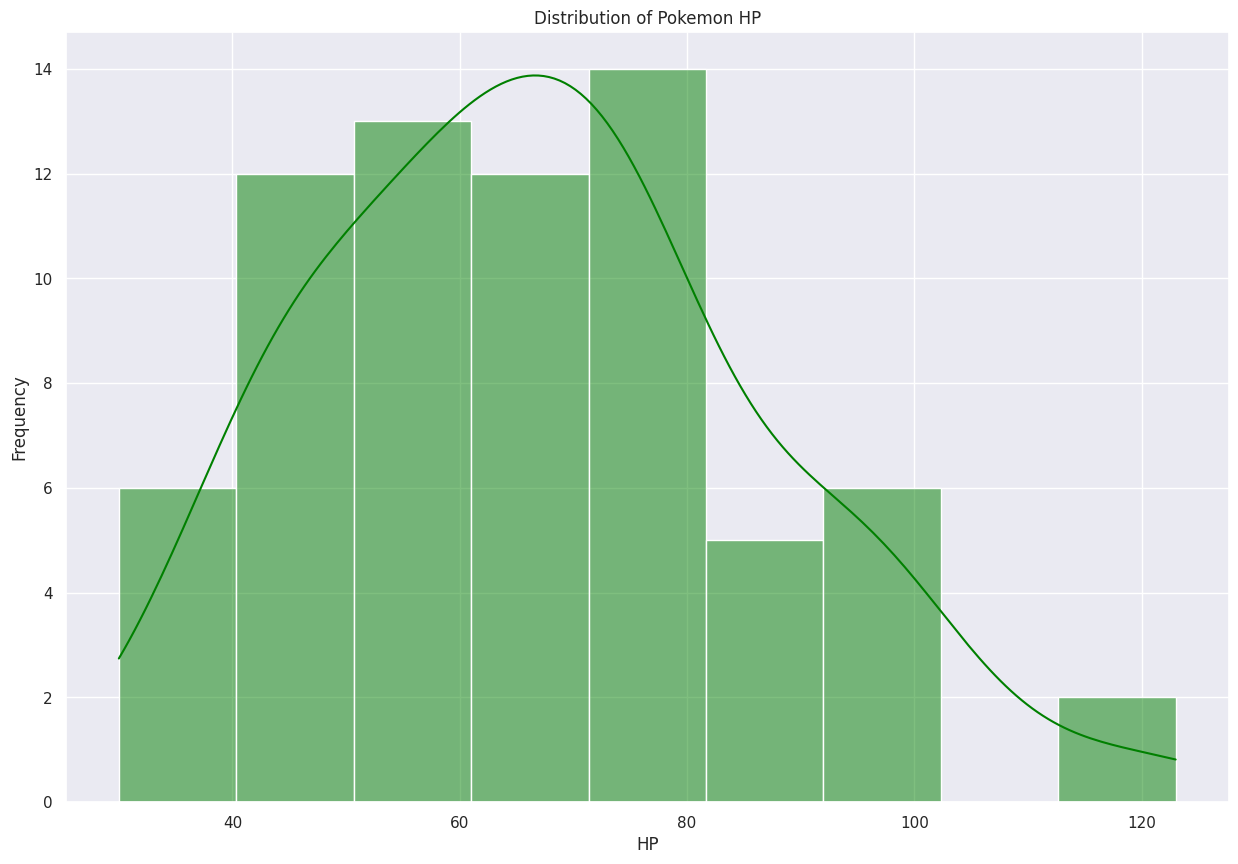

In [ ]:
sns.histplot(data=grass_pokemons, x='HP', kde=True, color='green')
plt.title('Distribution of Pokemon HP')
plt.xlabel('HP')
plt.ylabel('Frequency')
plt.show()

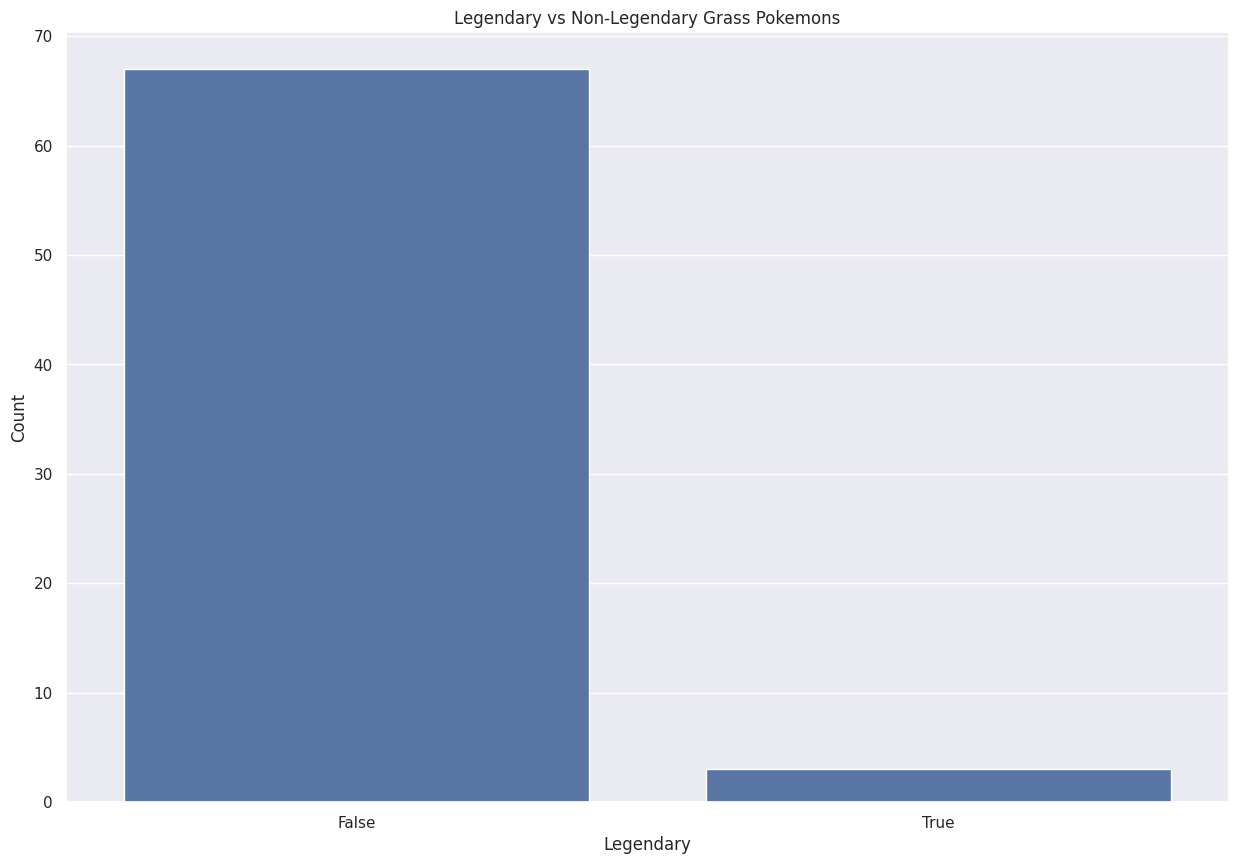

In [ ]:
sns.countplot(data=grass_pokemons, x='Legendary')
plt.title('Legendary vs Non-Legendary Grass Pokemons')
plt.xlabel('Legendary')
plt.ylabel('Count')
plt.show()

In [ ]:
fire_pokemon = pokemon[pokemon['Primary'] == 'Fire']
display(fire_pokemon)

,#,Name,Primary,Secondary Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
42,37,Vulpix,Fire,NaN,299,38,41,40,50,65,65,1,False
43,38,Ninetales,Fire,NaN,505,73,76,75,81,100,100,1,False
63,58,Growlithe,Fire,NaN,350,55,70,45,70,50,60,1,False
64,59,Arcanine,Fire,NaN,555,90,110,80,100,80,95,1,False
83,77,Ponyta,Fire,NaN,410,50,85,55,65,65,90,1,False


In [ ]:
display(fire_pokemon['Attack'].min())
display(fire_pokemon['Attack'].max())
display(fire_pokemon['Attack'].mean())
display(fire_pokemon['Defense'].mean())

30

160

np.float64(84.76923076923077)

np.float64(67.76923076923077)

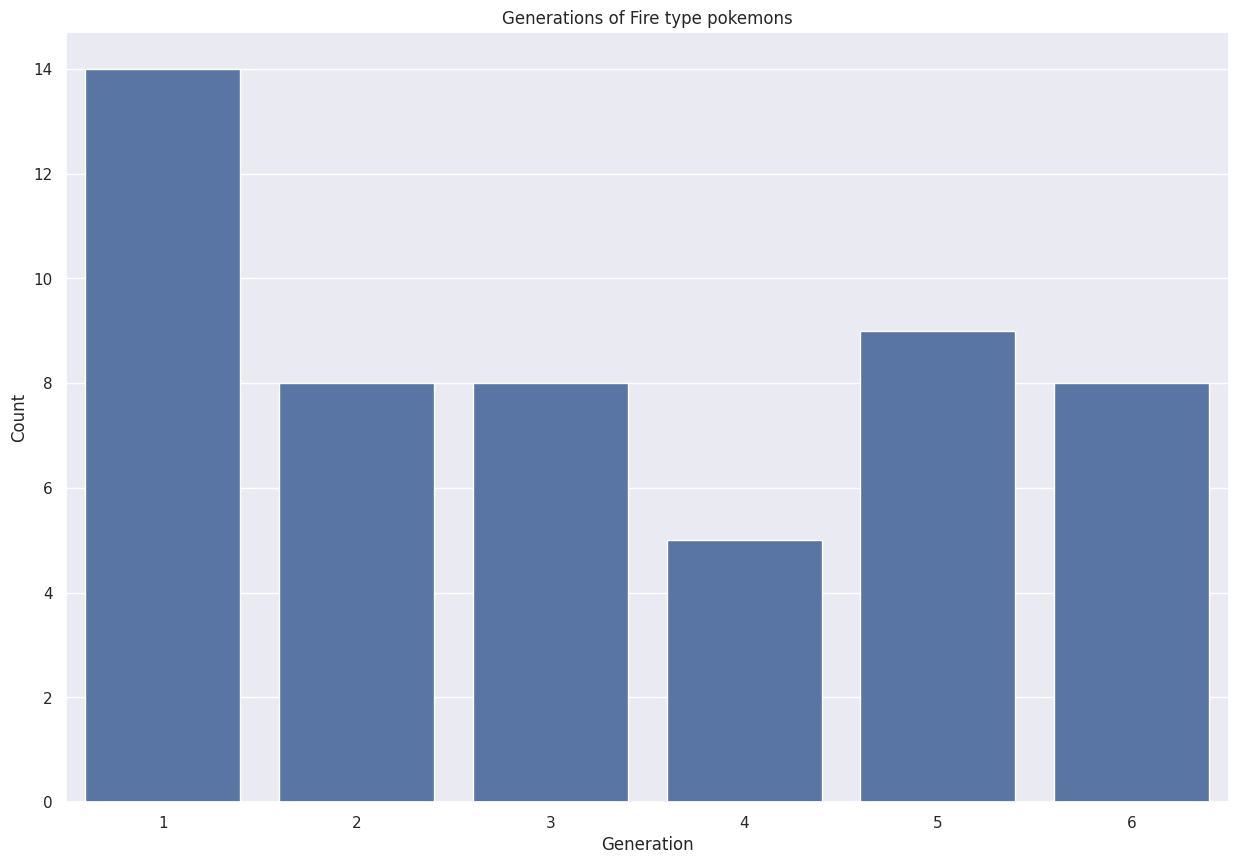

In [ ]:
sns.countplot(data=fire_pokemon, x='Generation')
plt.title('Generations of Fire type pokemons')
plt.xlabel('Generation')
plt.ylabel('Count')
plt.show()

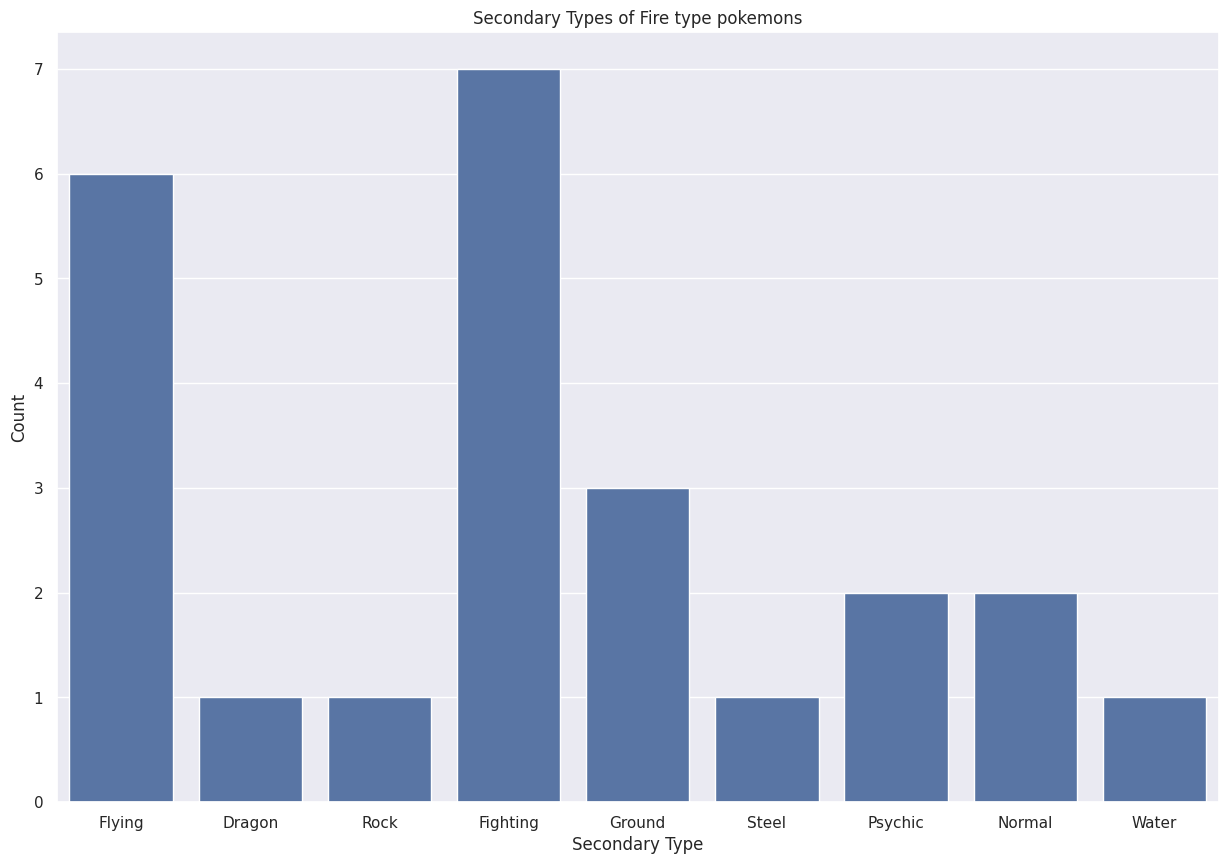

In [ ]:
sns.countplot(data=fire_pokemon, x='Secondary Type')
plt.title('Secondary Types of Fire type pokemons')
plt.xlabel('Secondary Type')
plt.ylabel('Count')
plt.show()

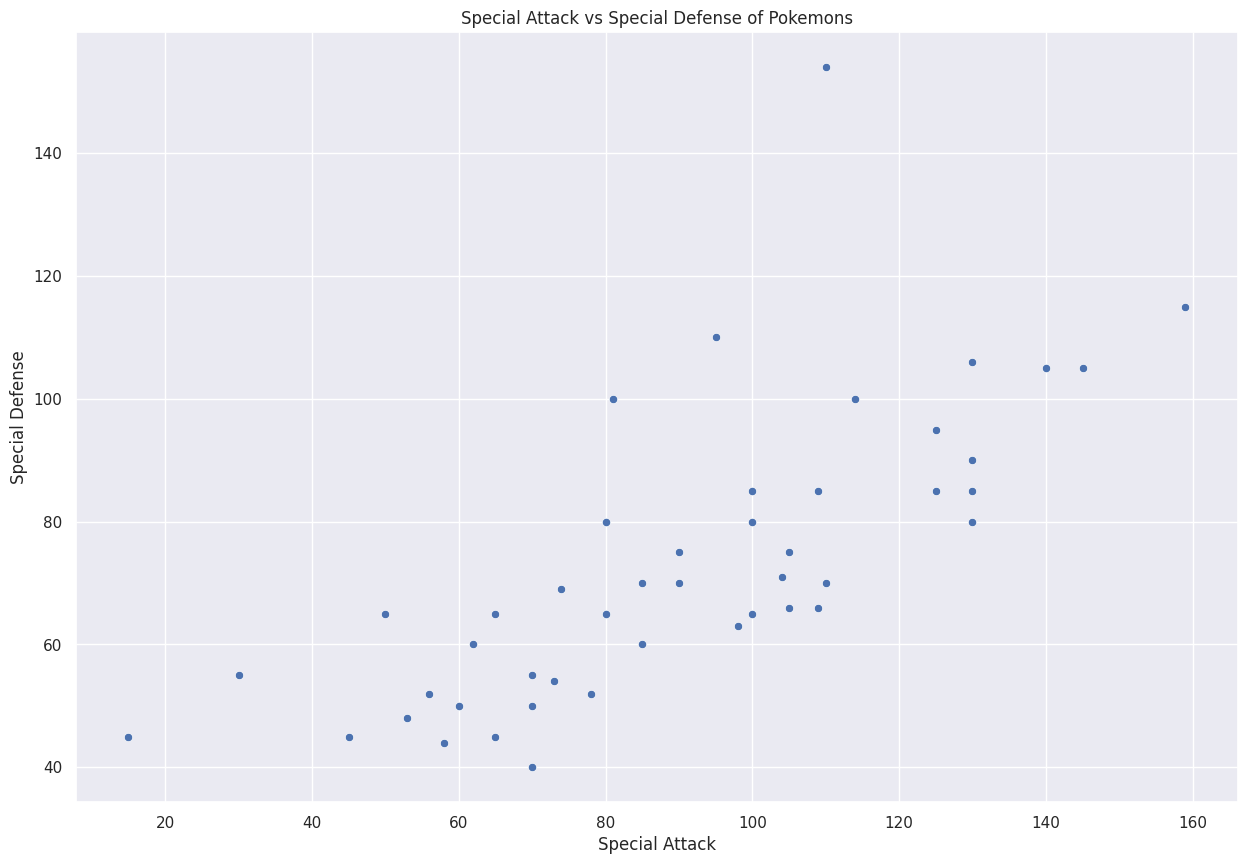

In [ ]:
sns.scatterplot(data=fire_pokemon, x='Sp. Atk', y='Sp. Def')
plt.title('Special Attack vs Special Defense of Pokemons')
plt.xlabel('Special Attack')
plt.ylabel('Special Defense')
plt.show()

# ***3. Credit Card Fraud Detection***

In [ ]:
df = pd.read_csv('/dataset.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

df['hour'] = df['trans_date_trans_time'].dt.hour
df['day'] = df['trans_date_trans_time'].dt.day
df['month'] = df['trans_date_trans_time'].dt.month

In [ ]:
drop_columns=['Unnamed: 0','trans_date_trans_time','first','last','street','city','state','zip','job','dob','trans_num']
df=df.drop(columns=drop_columns)

In [ ]:
df.head()

,cc_num,merchant,category,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hour,day,month
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495.0,1.325376e+09,36.011293,-82.048315,0.0,0,1,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149.0,1.325376e+09,49.159047,-118.186462,0.0,0,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154.0,1.325376e+09,43.150704,-112.154481,0.0,0,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939.0,1.325376e+09,47.034331,-112.561071,0.0,0,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99.0,1.325376e+09,38.674999,-78.632459,0.0,0,1,1


In [ ]:
cat_col = ['merchant', 'category', 'gender']
encoders = {}
for col in cat_col:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])

In [ ]:
def haversine(lat1, lon1, lat2, lon2):
    return np.array([geodesic((a, b), (c, d)).km for a,b,c,d in zip(lat1, lon1, lat2, lon2)])

# Drop rows with missing coordinate values before calculating distance
df.dropna(subset=['lat', 'long', 'merch_lat', 'merch_long'], inplace=True)

df['distance'] = haversine(df['lat'], df['long'], df['merch_lat'], df['merch_long'])

In [ ]:
df.head()

,cc_num,merchant,category,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hour,day,month,distance
0,2703186189652095,514,9,4.97,0,36.0788,-81.1781,3495.0,1.325376e+09,36.011293,-82.048315,0.0,0,1,1,78.773821
1,630423337322,241,4,107.23,0,48.8878,-118.2105,149.0,1.325376e+09,49.159047,-118.186462,0.0,0,1,1,30.216618
2,38859492057661,390,0,220.11,1,42.1808,-112.2620,4154.0,1.325376e+09,43.150704,-112.154481,0.0,0,1,1,108.102912
3,3534093764340240,360,2,45.00,1,46.2306,-112.1138,1939.0,1.325376e+09,47.034331,-112.561071,0.0,0,1,1,95.685115
4,375534208663984,297,10,41.96,1,38.4207,-79.4629,99.0,1.325376e+09,38.674999,-78.632459,0.0,0,1,1,77.702395


In [ ]:
features = ['merchant', 'category', 'amt', 'cc_num', 'gender','hour', 'day', 'month', 'distance']
x=df[features]
y=df['is_fraud']

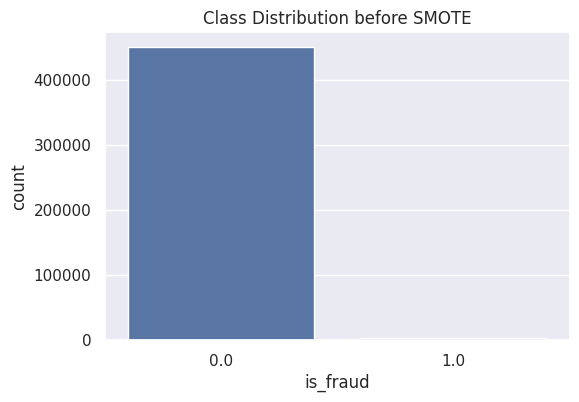

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='is_fraud', data=df)
plt.title('Class Distribution before SMOTE')
plt.show()

In [ ]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

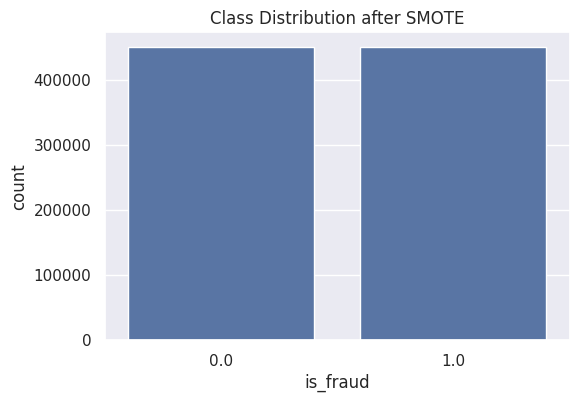

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_resampled)
plt.title('Class Distribution after SMOTE')
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
lgb_model = lgb.LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=200,
    max_depth=-1,
    is_unbalance=True,
    metrics='auc',
    objective='binary'
)
lgb_model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 360401, number of negative: 360746
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1100
[LightGBM] [Info] Number of data points in the train set: 721147, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499761 -> initscore=-0.000957
[LightGBM] [Info] Start training from score -0.000957


LGBMClassifier(is_unbalance=True, learning_rate=0.05, metrics='auc',
               n_estimators=200, objective='binary')

In [ ]:
y_pred = lgb_model.predict(x_test)

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Roc AUC Score: ", roc_auc_score(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.94      0.98      0.96     89971
         1.0       0.98      0.94      0.96     90316

    accuracy                           0.96    180287
   macro avg       0.96      0.96      0.96    180287
weighted avg       0.96      0.96      0.96    180287

Roc AUC Score:  0.9593422274293422


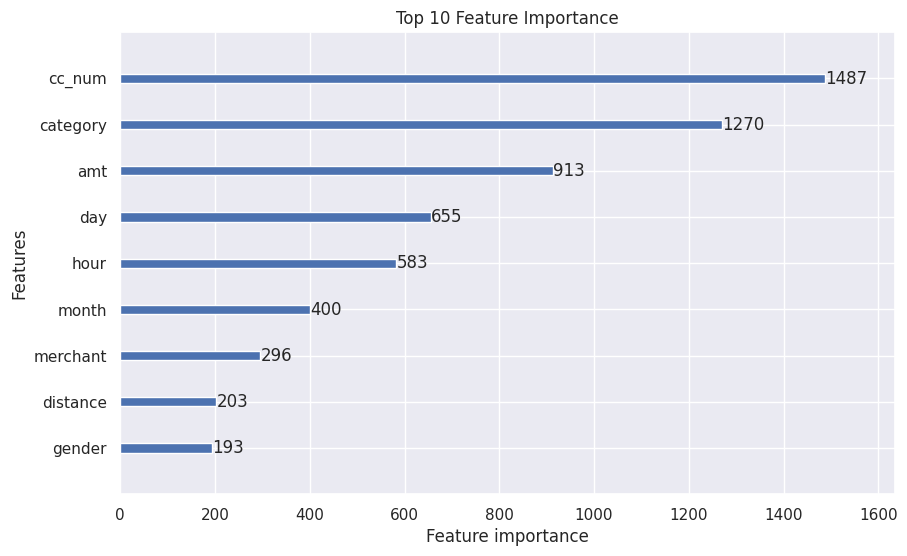

In [ ]:
lgb.plot_importance(lgb_model, max_num_features=10, importance_type='split', figsize=(10,6))
plt.title('Top 10 Feature Importance')
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, lgb_model.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

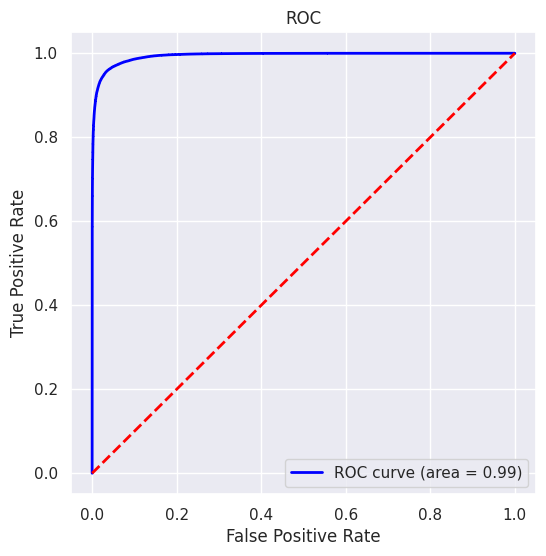

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
joblib.dump(lgb_model, 'fraud_detection_model.jb')
joblib.dump(encoders, 'label_encoder.jb')

['label_encoder.jb']